# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [35]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import statistics as s
from sklearn.cross_validation import ShuffleSplit
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))
print(prices.describe)

Boston housing dataset has 489 data points with 4 variables each.
<bound method NDFrame.describe of 0      504000.0
1      453600.0
2      728700.0
3      701400.0
4      760200.0
5      602700.0
6      480900.0
7      569100.0
8      346500.0
9      396900.0
10     315000.0
11     396900.0
12     455700.0
13     428400.0
14     382200.0
15     417900.0
16     485100.0
17     367500.0
18     424200.0
19     382200.0
20     285600.0
21     411600.0
22     319200.0
23     304500.0
24     327600.0
25     291900.0
26     348600.0
27     310800.0
28     386400.0
29     441000.0
         ...   
459    350700.0
460    252000.0
461    306600.0
462    449400.0
463    483000.0
464    497700.0
465    525000.0
466    457800.0
467    432600.0
468    445200.0
469    401100.0
470    432600.0
471    319200.0
472    147000.0
473    170100.0
474    285600.0
475    422100.0
476    457800.0
477    514500.0
478    485100.0
479    413700.0
480    384300.0
481    445200.0
482    367500.0
483    352800.0
484 

## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

105000.0
[ 179098.59189784]
[-17759.04832737]
[-40647.21475514]
Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


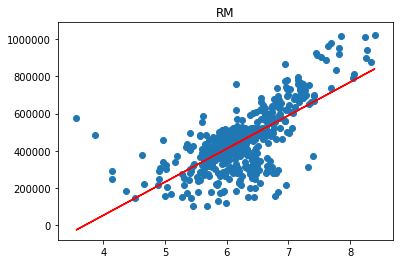

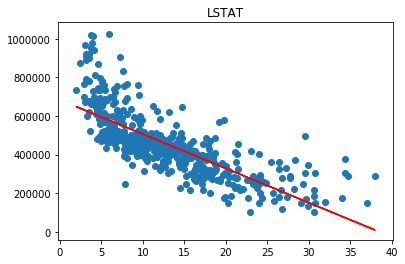

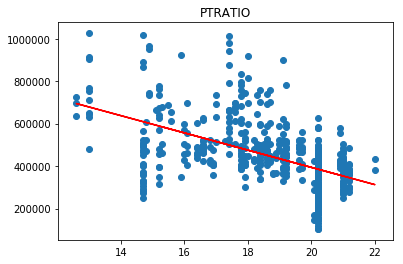

In [36]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)
print(minimum_price)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)


target = prices    
### Linear Regression from Scikit-Learn
model = LinearRegression()
for variable in ['RM', 'LSTAT', 'PTRATIO']:
    x = data[variable].values.reshape(-1, 1)
    model.fit(x, prices)
    print(model.coef_)
### Data visualization using matplotlib e numpy    
for variable in ['RM', 'LSTAT', 'PTRATIO']:
    x = data[variable].values
    fig, ax = plt.subplots()
    fit = np.polyfit(x, target , deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    plt.title(variable)
    ax.scatter(x, target )
fig.show()

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: 
1.The home with a higher 'RM' value means that the average number of rooms is more which can be linked with a luxurious lifestyle ie the more rooms you have the likelihood of you being wealthy is also more.So, the prices should definitely increase.

2.A greater 'LSTAT' percentage means that is the there are more lower class people there which should decrease the value of 'MEDV' perhaps because of the community.

3.In 'PTRATIO'  we talk about the ratio of the students to teachers. For example if there are 100 students and 5 teachers, the ratio comes out to be 20:1. It can be thought that a lower ratio means that the class size is small and the small class means that the students are taken care of well. So for a small class size (better attention of the teacher) you must pay more.
So, we a decrease in the value of 'PTRATIO' the 'MEDV' value increases.**

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [37]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    print(y_true)
    print(y_predict)
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [38]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

[3, -0.5, 2, 7, 4.2]
[2.5, 0.0, 2.1, 7.8, 5.3]
Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**
Yes the model has successfully captured the variation of the target variable beacause the value of R2 is very close
to 1 . It is 0.923 ie 92.3% which I think is quite successful.
It is the distance between the actual point Y and the predicted point Y'. The moe variance that is accounted by the regression model,the closer the data points will fall to the fitted regression line.

The R2 method describes how well the regression line or the model is fitted to the trainning data. If the points are too 

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [39]:
print(features.shape)
print(prices.shape)
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,prices, test_size = 0.25, random_state=1)

# Success
print("Training and testing split was successful.")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(489, 3)
(489,)
Training and testing split was successful.
(366, 3)
(123, 3)
(366,)
(123,)


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **
Generally, the larger chunk of data is taken for the training set beacause the model needs to learn and get better ,if we make it too small then our model will memorize and thereby perform very bad on the testing set.We take the smaller part of the set for testing our model because we need to check whether our model really works on not given a set of dat which it has never seen before. 
Therefore, according to me 0.25 is a good parameter fr the test size.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

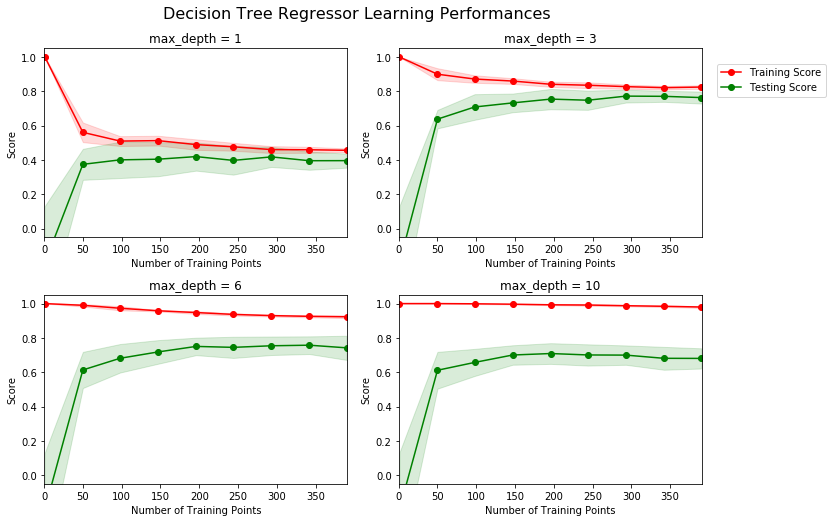

In [40]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **
I choose the 'max_depth' parameter to be equal to 3 because the lines for the training and testing are pretty close and also the score is higher than the rest.
-Testing score increases with training points and generalizes well    
-Training score decreases slightly with training points but fits dataset well
-More training points will not benefit the model and only "make the computer work harder" in terms of processing the data



### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

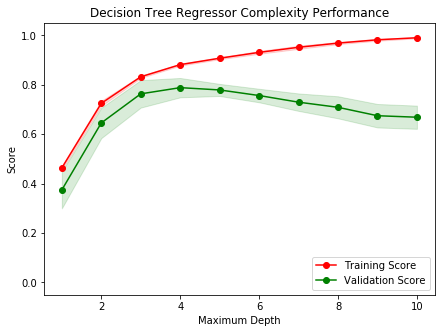

In [41]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: ** 
At maximum depth equal to 1, first of all both training and testing scores are less. There is also very less space between both the lines which indicates that the model is not fitting the dataset quite well and certainly not generalizing also therefore it has high bias.
At maximum depth equal to 10, training score is high but the testing score is less which means that the model performs well in training (because it memorisies it) not not so good on the testing beacuse it does not genralize well. Hence, it is high variance.The main visual cue was the huge gap between the training score and validation score.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: ** 
On close observation we can see from the graph that at maximum depth equal to 4 there is an increasing split between the Training score and the Validation score.That means that after that poiunt the model does not genralize well and starts memorising which is something that we do not want.Besides this it also gives us a fairly good score approximately 0.8 which is pretty good. Therefor maximum depth of 4 is the best in this scenario.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: ** 
The grid search is basically a method used for selecting the right hyperparameters for our model. Mainly, Kernel and C parameters.
The learning algorith depends on te hyperparameters. Grid search can be dine simply by drawing a table with column names C , Linear kernel , Polynomial kernel. We increase the value of the C parameter exponentially from 0.1 to 1 to 10 and so on. Then we record the f1 scores in each of the linear and polynomial cases. Now we just pick the one eith the highest F1 score.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: ** we first split our data into train and test and then apply k-fold on the train dataset. Now after this step we train our model on (k-1) folds and use 1 fold for cross-validation. This process is repeated k times, each time with a different cross-validation set. The average cross-validation score is used to check the performance of the model. Once you have selected the best parameters using gridSearch along with k-fold cross-validation, we use the test set to check the final performance of the model.
We use grid search for tuning the parameters and k-fold helps it to fiqure out the optimal set of parameters.
If we use grid search without cross validation we will have different parameters which can result in high variance when testing.
Hence,we do not 'lose' training data.Also randomising is quite easy using Kfold in sklearn.


### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [42]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.grid_search import GridSearchCV 

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=50)
    
    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    # list(range(1,11)) because range(1,11) was throwing error
    # https://stackoverflow.com/questions/45444953/parameter-values-for-parameter-n-estimators-need-to-be-a-sequence
    params = {'max_depth': list(range(1,11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [43]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

247    438900.0
259    434700.0
379    262500.0
39     646800.0
311    428400.0
276    487200.0
51     430500.0
49     407400.0
57     663600.0
378    275100.0
270    953400.0
53     491400.0
183    625800.0
126    329700.0
15     417900.0
170    474600.0
226    609000.0
471    319200.0
220    980700.0
454    411600.0
227    504000.0
56     518700.0
59     411600.0
391    361200.0
109    407400.0
429    312900.0
329    392700.0
141    302400.0
167    401100.0
299    338100.0
         ...   
95     596400.0
26     348600.0
176    835800.0
327    432600.0
301    407400.0
488    249900.0
35     396900.0
103    405300.0
269    737100.0
360    279300.0
9      396900.0
447    449400.0
91     462000.0
349    525000.0
111    478800.0
204    405300.0
313    525000.0
243    520800.0
81     501900.0
473    170100.0
22     319200.0
395    375900.0
125    449400.0
388    105000.0
399    157500.0
99     697200.0
437    312900.0
403    350700.0
242    512400.0
367    184800.0
Name: MEDV, Length: 74, 

247    438900.0
259    434700.0
379    262500.0
39     646800.0
311    428400.0
276    487200.0
51     430500.0
49     407400.0
57     663600.0
378    275100.0
270    953400.0
53     491400.0
183    625800.0
126    329700.0
15     417900.0
170    474600.0
226    609000.0
471    319200.0
220    980700.0
454    411600.0
227    504000.0
56     518700.0
59     411600.0
391    361200.0
109    407400.0
429    312900.0
329    392700.0
141    302400.0
167    401100.0
299    338100.0
         ...   
95     596400.0
26     348600.0
176    835800.0
327    432600.0
301    407400.0
488    249900.0
35     396900.0
103    405300.0
269    737100.0
360    279300.0
9      396900.0
447    449400.0
91     462000.0
349    525000.0
111    478800.0
204    405300.0
313    525000.0
243    520800.0
81     501900.0
473    170100.0
22     319200.0
395    375900.0
125    449400.0
388    105000.0
399    157500.0
99     697200.0
437    312900.0
403    350700.0
242    512400.0
367    184800.0
Name: MEDV, Length: 74, 

[ 867300.          248100.          709800.          248100.          455100.
  566100.          428200.          248100.          328300.          428200.
  569100.          328300.          431287.5         372750.          431287.5
  455100.          564900.          431287.5         566100.          494620.
  248100.          498150.          428200.          498150.          960225.
  632520.          431287.5         428200.          835800.          431287.5
  498150.          568575.          428200.          632520.          494620.
  498150.          431287.5         564900.          431287.5         257460.
  169527.27272727  671100.          724325.          680400.          431287.5
  455100.          428200.          416713.04347826  566100.          372750.
  397600.          632520.          248100.          835800.          431287.5
  428200.          566100.          416713.04347826  489037.5         257460.
  428200.          428200.          428200.          375900.

   151200.           495600.           201600.        ]
0      504000.0
342    632100.0
265    672000.0
444    371700.0
183    625800.0
421    176400.0
1      453600.0
271    743400.0
366    258300.0
152    321300.0
51     430500.0
234    466200.0
198    474600.0
323    434700.0
280    783300.0
356    289800.0
332    501900.0
365    237300.0
361    275100.0
397    147000.0
148    373800.0
390    585900.0
449    399000.0
219    663600.0
122    430500.0
431    296100.0
350    417900.0
311    428400.0
354    459900.0
22     319200.0
         ...   
50     413700.0
460    252000.0
82     520800.0
472    147000.0
45     405300.0
203    455700.0
368    151200.0
97     812700.0
384    151200.0
72     478800.0
195    506100.0
458    279300.0
468    445200.0
296    592200.0
447    449400.0
15     417900.0
360    279300.0
138    279300.0
105    409500.0
220    980700.0
114    388500.0
379    262500.0
359    291900.0
243    520800.0
194    690900.0
206    590100.0
448    417900.0
438    296100.0


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: ** The answer for 'max_depth' for optimial model is 4, In question I guessed as it is 4 but it looks nice to find out the answer and compare it.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [44]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))
    


Predicted selling price for Client 1's home: $411,417.39
Predicted selling price for Client 2's home: $231,918.75
Predicted selling price for Client 3's home: $937,230.00


**Answer: ** All of the predicted prices seems significant to the features, 
Predicted selling price for Client 1's home $411,417.39 ,
this price can be justified due to the average poverty level and student-to-teacher ratio.
The price is is within one standard deviation of the mean at approximately 454k.
It has  5 rooms and a relatively low neighborhood poverty level and student-teacher ratio, this would be a good selling price.

Predicted selling price for Client 2's home: 231,918.75,
it might be due to the high poverty level and student-to-teacher ratio.The minimum selling price in the area is $105k approx. 
However, their 4 rooms are helping raise the price of their home, since both teacher-student ratio and provery levels are quite high therefore there is a negative effect on the selling price.

Predicted selling price for Client 3's home: $937,230.00,
it is much greater than the mean and median prices, nearing to the maximum price.This can be due to the low poverty level and student-to-teacher ratio with a high number of rooms.
With a large number of rooms, very low neighborhood poverty levels and low student-teacher ratio, this home's selling price is near the maximum selling price in the neighborhood and is reasonably priced





### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [45]:
vs.PredictTrials(features, prices, fit_model, client_data)

155    327600.0
181    621600.0
456    625800.0
339    480900.0
48     302400.0
109    407400.0
444    371700.0
305    373800.0
17     367500.0
79     426300.0
173    516600.0
470    432600.0
190    699300.0
91     462000.0
86     472500.0
175    781200.0
309    499800.0
156    275100.0
209    489300.0
405    436800.0
53     491400.0
11     396900.0
321    407400.0
315    483000.0
431    296100.0
282    501900.0
262    512400.0
390    585900.0
345    373800.0
237    388500.0
         ...   
216    632100.0
428    247800.0
55     743400.0
486    501900.0
36     420000.0
59     411600.0
89     602700.0
484    470400.0
382    132300.0
62     466200.0
420    182700.0
33     275100.0
269    737100.0
427    226800.0
28     386400.0
124    394800.0
285    569100.0
438    296100.0
130    403200.0
252    905100.0
34     283500.0
217    940800.0
283    455700.0
460    252000.0
316    466200.0
152    321300.0
278    520800.0
266    697200.0
469    401100.0
227    504000.0
Name: MEDV, Length: 79, 

45     405300.0
368    151200.0
388    105000.0
119    405300.0
188    653100.0
172    487200.0
136    365400.0
340    506100.0
328    399000.0
416    300300.0
148    373800.0
140    294000.0
178    795900.0
350    417900.0
326    388500.0
35     396900.0
316    466200.0
293    758100.0
448    417900.0
437    312900.0
216    632100.0
199    512400.0
349    525000.0
190    699300.0
94     432600.0
168    485100.0
120    462000.0
40     732900.0
262    512400.0
156    275100.0
         ...   
404    298200.0
332    501900.0
255    766500.0
455    487200.0
121    426300.0
480    384300.0
84     501900.0
80     588000.0
79     426300.0
175    781200.0
315    483000.0
67     462000.0
386    174300.0
221    661500.0
321    407400.0
378    275100.0
273    676200.0
263    739200.0
335    361200.0
128    378000.0
474    285600.0
322    466200.0
222    510300.0
42     531300.0
306    415800.0
105    409500.0
204    405300.0
137    359100.0
143    327600.0
345    373800.0
Name: MEDV, Length: 79, 

415    338100.0
131    411600.0
184    732900.0
127    340200.0
44     445200.0
344    432600.0
326    388500.0
372    241500.0
135    380100.0
116    445200.0
454    411600.0
174    627900.0
165    468300.0
41     558600.0
292    695100.0
347    476700.0
188    653100.0
474    285600.0
299    338100.0
456    625800.0
291    554400.0
149    323400.0
148    373800.0
215    577500.0
104    422100.0
356    289800.0
341    390600.0
263    739200.0
480    384300.0
61     336000.0
         ...   
314    516600.0
86     472500.0
274    462000.0
432    273000.0
371    214200.0
287    472500.0
328    399000.0
324    443100.0
367    184800.0
175    781200.0
68     365400.0
87     466200.0
359    291900.0
30     266700.0
190    699300.0
264    680400.0
404    298200.0
472    147000.0
177    760200.0
106    409500.0
439    266700.0
354    459900.0
59     411600.0
53     491400.0
191    636300.0
209    489300.0
460    252000.0
14     382200.0
99     697200.0
145    289800.0
Name: MEDV, Length: 79, 

  505633.33333333  388500.          417900.          258300.        ]
44     445200.0
358    315000.0
463    483000.0
79     426300.0
487    462000.0
209    489300.0
388    105000.0
480    384300.0
170    474600.0
259    434700.0
174    627900.0
408    174300.0
46     420000.0
193    732900.0
417    245700.0
486    501900.0
131    411600.0
464    497700.0
4      760200.0
155    327600.0
22     319200.0
137    359100.0
182    672000.0
121    426300.0
88     495600.0
62     466200.0
82     520800.0
223    665700.0
456    625800.0
169    495600.0
         ...   
176    835800.0
345    373800.0
112    394800.0
437    312900.0
165    468300.0
192    726600.0
292    695100.0
65     493500.0
403    350700.0
207    497700.0
50     413700.0
199    512400.0
168    485100.0
359    291900.0
180    554400.0
290    462000.0
307    485100.0
286    426300.0
85     558600.0
262    512400.0
400    218400.0
189    611100.0
237    388500.0
276    487200.0
152    321300.0
120    462000.0
308    441000.0
44

Name: MEDV, Length: 79, dtype: float64
[ 387333.33333333  387333.33333333  387333.33333333  387333.33333333
  387333.33333333  387333.33333333  634812.5         387333.33333333
  634812.5         387333.33333333  387333.33333333  387333.33333333
  387333.33333333  387333.33333333  387333.33333333  634812.5         634812.5
  387333.33333333  387333.33333333  387333.33333333  387333.33333333
  634812.5         387333.33333333  634812.5         387333.33333333
  387333.33333333  387333.33333333  387333.33333333  387333.33333333
  387333.33333333  634812.5         387333.33333333  387333.33333333
  387333.33333333  387333.33333333  387333.33333333  387333.33333333
  387333.33333333  387333.33333333  387333.33333333  634812.5         634812.5
  634812.5         387333.33333333  387333.33333333  387333.33333333
  387333.33333333  634812.5         634812.5         634812.5
  387333.33333333  387333.33333333  387333.33333333  634812.5         634812.5
  634812.5         387333.33333333  38733

169    495600.0
243    520800.0
368    151200.0
121    426300.0
445    409500.0
211    451500.0
388    105000.0
353    577500.0
221    661500.0
123    363300.0
196    888300.0
395    375900.0
413    304500.0
193    732900.0
460    252000.0
312    388500.0
418    281400.0
463    483000.0
328    399000.0
1      453600.0
265    672000.0
248    924000.0
443    344400.0
108    415800.0
44     445200.0
348    474600.0
333    655200.0
476    457800.0
270    953400.0
242    512400.0
         ...   
276    487200.0
130    403200.0
48     302400.0
329    392700.0
125    449400.0
363    218400.0
487    462000.0
143    327600.0
170    474600.0
343    382200.0
372    241500.0
71     455700.0
133    386400.0
131    411600.0
341    390600.0
311    428400.0
241    550200.0
390    585900.0
313    525000.0
224    875700.0
472    147000.0
229    661500.0
249    756000.0
109    407400.0
477    514500.0
202    420000.0
168    485100.0
95     596400.0
22     319200.0
59     411600.0
Name: MEDV, Length: 79, 

154    357000.0
421    176400.0
180    554400.0
138    279300.0
417    245700.0
153    407400.0
263    739200.0
18     424200.0
207    497700.0
134    327600.0
140    294000.0
386    174300.0
254    651000.0
445    409500.0
91     462000.0
187    764400.0
24     327600.0
441    312900.0
305    373800.0
485    432600.0
268    611100.0
53     491400.0
356    289800.0
454    411600.0
14     382200.0
276    487200.0
407    245700.0
280    783300.0
178    795900.0
26     348600.0
         ...   
338    558600.0
475    422100.0
227    504000.0
387    178500.0
12     455700.0
73     491400.0
449    399000.0
281    585900.0
97     812700.0
374    487200.0
194    690900.0
21     411600.0
466    457800.0
79     426300.0
365    237300.0
345    373800.0
200    472500.0
41     558600.0
32     277200.0
131    411600.0
77     436800.0
418    281400.0
439    266700.0
20     285600.0
278    520800.0
96     449400.0
461    306600.0
141    302400.0
483    352800.0
379    262500.0
Name: MEDV, Length: 79, 

456     625800.0
182     672000.0
191     636300.0
251     709800.0
44      445200.0
224     875700.0
351     436800.0
466     457800.0
441     312900.0
89      602700.0
359     291900.0
1       453600.0
465     525000.0
292     695100.0
271     743400.0
431     296100.0
188     653100.0
223     665700.0
328     399000.0
196     888300.0
249     756000.0
183     625800.0
14      382200.0
360     279300.0
467     432600.0
122     430500.0
371     214200.0
36      420000.0
163     499800.0
71      455700.0
         ...    
219     663600.0
279     598500.0
335     361200.0
272     966000.0
12      455700.0
297     478800.0
25      291900.0
286     426300.0
15      417900.0
366     258300.0
398     151200.0
53      491400.0
157     867300.0
302     453600.0
258     913500.0
52      525000.0
37      441000.0
178     795900.0
437     312900.0
372     241500.0
81      501900.0
473     170100.0
312     388500.0
167     401100.0
354     459900.0
323     434700.0
226     609000.0
253    1024800

412    199500.0
340    506100.0
351    436800.0
418    281400.0
405    436800.0
45     405300.0
86     472500.0
202    420000.0
232    462000.0
133    386400.0
91     462000.0
134    327600.0
332    501900.0
246    459900.0
329    392700.0
425    386400.0
384    151200.0
241    550200.0
338    558600.0
381    105000.0
373    317100.0
358    315000.0
76     420000.0
422    268800.0
323    434700.0
321    407400.0
125    449400.0
335    361200.0
342    632100.0
485    432600.0
         ...   
396    342300.0
406    281400.0
440    283500.0
374    487200.0
410    228900.0
203    455700.0
419    201600.0
310    485100.0
188    653100.0
476    457800.0
248    924000.0
350    417900.0
355    485100.0
234    466200.0
392    577500.0
446    424200.0
211    451500.0
456    625800.0
292    695100.0
13     428400.0
130    403200.0
400    218400.0
279    598500.0
142    281400.0
54     396900.0
428    247800.0
461    306600.0
46     420000.0
436    373800.0
311    428400.0
Name: MEDV, Length: 79, 

233    422100.0
352    352800.0
76     420000.0
308    441000.0
111    478800.0
463    483000.0
229    661500.0
293    758100.0
465    525000.0
271    743400.0
139    373800.0
326    388500.0
300    464100.0
256    478800.0
99     697200.0
457    289800.0
169    495600.0
133    386400.0
469    401100.0
46     420000.0
311    428400.0
181    621600.0
329    392700.0
124    394800.0
450    401100.0
343    382200.0
147    306600.0
367    184800.0
273    676200.0
86     472500.0
         ...   
142    281400.0
176    835800.0
413    304500.0
153    407400.0
82     520800.0
15     417900.0
51     430500.0
166    365400.0
151    411600.0
264    680400.0
6      480900.0
313    525000.0
145    289800.0
401    184800.0
317    405300.0
202    420000.0
425    386400.0
321    407400.0
127    340200.0
125    449400.0
96     449400.0
263    739200.0
226    609000.0
473    170100.0
79     426300.0
355    485100.0
122    430500.0
476    457800.0
7      569100.0
115    384300.0
Name: MEDV, Length: 79, 

253    1024800.0
91      462000.0
364     228900.0
144     247800.0
264     680400.0
434     319200.0
438     296100.0
440     283500.0
291     554400.0
403     350700.0
219     663600.0
481     445200.0
124     394800.0
457     289800.0
221     661500.0
228     527100.0
467     432600.0
444     371700.0
70      508200.0
331     346500.0
157     867300.0
164     499800.0
246     459900.0
431     296100.0
118     428400.0
404     298200.0
113     392700.0
233     422100.0
218     789600.0
401     184800.0
         ...    
46      420000.0
207     497700.0
105     409500.0
49      407400.0
205     470400.0
357     289800.0
136     365400.0
287     472500.0
139     373800.0
62      466200.0
21      411600.0
452     422100.0
85      558600.0
270     953400.0
315     483000.0
133     386400.0
148     373800.0
68      365400.0
475     422100.0
147     306600.0
239     430500.0
94      432600.0
408     174300.0
250     632100.0
470     432600.0
476     457800.0
93      525000.0
380     178500

  337529.62962963  337529.62962963  558348.        ]
373    317100.0
100    577500.0
68     365400.0
367    184800.0
306    415800.0
196    888300.0
484    470400.0
151    411600.0
128    378000.0
449    399000.0
35     396900.0
171    617400.0
88     495600.0
430    264600.0
109    407400.0
49     407400.0
361    275100.0
56     518700.0
24     327600.0
117    403200.0
55     743400.0
295    701400.0
236    369600.0
34     283500.0
327    432600.0
204    405300.0
462    449400.0
178    795900.0
443    344400.0
405    436800.0
         ...   
402    176400.0
183    625800.0
147    306600.0
474    285600.0
47     348600.0
113    392700.0
459    350700.0
460    252000.0
1      453600.0
123    363300.0
447    449400.0
41     558600.0
11     396900.0
469    401100.0
473    170100.0
311    428400.0
362    214200.0
428    247800.0
65     493500.0
146    327600.0
478    485100.0
118    428400.0
6      480900.0
21     411600.0
8      346500.0
288    609000.0
380    178500.0
424    359100.0
346

Name: MEDV, Length: 79, dtype: float64
[ 502988.88888889  325325.          502988.88888889  544641.17647059
  433766.66666667  502988.88888889  433766.66666667  235157.14285714
  502988.88888889  433766.66666667  433766.66666667  433766.66666667
  439478.57142857  729150.          652260.          439478.57142857
  502988.88888889  325325.          235157.14285714  544641.17647059
  625100.          325325.          502988.88888889  502988.88888889
  325325.          439478.57142857  625100.          330750.          325325.
  439478.57142857  544641.17647059  433766.66666667  439478.57142857
  439478.57142857  325325.          439478.57142857  439478.57142857
  729150.          439478.57142857  439478.57142857  439478.57142857
  439478.57142857  544641.17647059  439478.57142857  325325.          218400.
  433766.66666667  235157.14285714  235157.14285714  729150.          325325.
  544641.17647059  652260.          433766.66666667  729150.
  502988.88888889  439478.57142857  544641.17

259     434700.0
410     228900.0
459     350700.0
331     346500.0
53      491400.0
362     214200.0
225    1014300.0
450     401100.0
231     489300.0
320     359100.0
312     388500.0
239     430500.0
300     464100.0
455     487200.0
218     789600.0
163     499800.0
79      426300.0
43      518700.0
106     409500.0
99      697200.0
187     764400.0
361     275100.0
120     462000.0
247     438900.0
208     525000.0
390     585900.0
125     449400.0
296     592200.0
232     462000.0
373     317100.0
         ...    
346     455700.0
407     245700.0
46      420000.0
368     151200.0
2       728700.0
384     151200.0
156     275100.0
467     432600.0
12      455700.0
298     426300.0
313     525000.0
221     661500.0
59      411600.0
10      315000.0
336     485100.0
442     420000.0
341     390600.0
122     430500.0
97      812700.0
184     732900.0
326     388500.0
190     699300.0
215     577500.0
380     178500.0
271     743400.0
235     497700.0
364     228900.0
180     554400

274    462000.0
145    289800.0
336    485100.0
182    672000.0
180    554400.0
392    577500.0
91     462000.0
26     348600.0
234    466200.0
192    726600.0
200    472500.0
141    302400.0
387    178500.0
397    147000.0
465    525000.0
241    550200.0
140    294000.0
12     455700.0
385    254100.0
276    487200.0
104    422100.0
118    428400.0
264    680400.0
423    220500.0
239    430500.0
444    371700.0
389    249900.0
163    499800.0
311    428400.0
48     302400.0
         ...   
483    352800.0
265    672000.0
77     436800.0
89     602700.0
263    739200.0
152    321300.0
129    300300.0
3      701400.0
121    426300.0
320    359100.0
46     420000.0
86     472500.0
181    621600.0
184    732900.0
334    367500.0
424    359100.0
298    426300.0
327    432600.0
6      480900.0
232    462000.0
235    497700.0
147    306600.0
114    388500.0
383    117600.0
471    319200.0
158    510300.0
333    655200.0
411    231000.0
59     411600.0
408    174300.0
Name: MEDV, Length: 79, 

447    449400.0
388    105000.0
423    220500.0
465    525000.0
391    361200.0
378    275100.0
369    220500.0
358    315000.0
248    924000.0
113    392700.0
22     319200.0
294    596400.0
387    178500.0
454    411600.0
359    291900.0
476    457800.0
166    365400.0
188    653100.0
82     520800.0
442    420000.0
237    388500.0
77     436800.0
296    592200.0
116    445200.0
48     302400.0
396    342300.0
196    888300.0
147    306600.0
299    338100.0
20     285600.0
         ...   
483    352800.0
364    228900.0
28     386400.0
474    285600.0
214    455700.0
81     501900.0
440    283500.0
381    105000.0
433    281400.0
1      453600.0
461    306600.0
109    407400.0
456    625800.0
186    640500.0
329    392700.0
347    476700.0
201    512400.0
311    428400.0
322    466200.0
12     455700.0
158    510300.0
379    262500.0
229    661500.0
187    764400.0
175    781200.0
464    497700.0
238    510300.0
43     518700.0
49     407400.0
93     525000.0
Name: MEDV, Length: 79, 

Name: MEDV, Length: 79, dtype: float64
[ 509216.12903226  908250.          431900.          600218.18181818
  527400.          696360.          434791.30434783  835800.          431900.
  491596.875       431900.          491596.875       215600.
  301997.87234043  434791.30434783  431900.          329437.5
  301997.87234043  413368.42105263  431900.          431900.          431900.
  908250.          527400.          696360.          431900.          596820.
  431900.          301997.87234043  527400.          215600.          329437.5
  301997.87234043  215600.          431900.          431900.
  434791.30434783  491596.875       301997.87234043  434791.30434783
  215600.          215600.          953750.          689250.          215600.
  434791.30434783  431900.          491596.875       509216.12903226
  527400.          596820.          301997.87234043  509216.12903226
  509216.12903226  431900.          434791.30434783  760200.          491596.875
  491596.875       491596.875

391     361200.0
199     512400.0
205     470400.0
431     296100.0
352     352800.0
464     497700.0
190     699300.0
299     338100.0
301     407400.0
354     459900.0
294     596400.0
23      304500.0
410     228900.0
164     499800.0
353     577500.0
406     281400.0
388     105000.0
339     480900.0
193     732900.0
146     327600.0
459     350700.0
375     203700.0
41      558600.0
165     468300.0
486     501900.0
119     405300.0
85      558600.0
37      441000.0
442     420000.0
260     443100.0
         ...    
356     289800.0
363     218400.0
471     319200.0
279     598500.0
387     178500.0
197    1018500.0
359     291900.0
488     249900.0
160     567000.0
125     449400.0
215     577500.0
282     501900.0
345     373800.0
456     625800.0
75      449400.0
145     289800.0
7       569100.0
367     184800.0
167     401100.0
54      396900.0
57      663600.0
235     497700.0
479     413700.0
65      493500.0
427     226800.0
137     359100.0
468     445200.0
38      518700

Trial 5: $418,377.27
48     302400.0
278    520800.0
5      602700.0
335    361200.0
467    432600.0
257    644700.0
449    399000.0
126    329700.0
45     405300.0
69     438900.0
293    758100.0
424    359100.0
51     430500.0
38     518700.0
455    487200.0
370    155400.0
79     426300.0
133    386400.0
447    449400.0
244    621600.0
190    699300.0
396    342300.0
341    390600.0
161    476700.0
479    413700.0
330    686700.0
31     304500.0
2      728700.0
255    766500.0
402    176400.0
         ...   
378    275100.0
109    407400.0
127    340200.0
483    352800.0
169    495600.0
386    174300.0
357    289800.0
480    384300.0
9      396900.0
220    980700.0
476    457800.0
209    489300.0
143    327600.0
270    953400.0
135    380100.0
473    170100.0
314    516600.0
63     525000.0
375    203700.0
304    340200.0
68     365400.0
23     304500.0
129    300300.0
273    676200.0
296    592200.0
19     382200.0
15     417900.0
365    237300.0
36     420000.0
430    264600.0
Nam

Name: MEDV, Length: 79, dtype: float64
[ 872812.5         424448.38709677  481875.          424448.38709677
  348311.76470588  261700.          596644.18604651  481875.
  348311.76470588  261700.          481875.          596644.18604651
  261700.          424448.38709677  596644.18604651  261700.          481875.
  481875.          261700.          261700.          348311.76470588
  261700.          424448.38709677  596644.18604651  424448.38709677
  596644.18604651  596644.18604651  481875.          424448.38709677
  348311.76470588  261700.          424448.38709677  261700.
  348311.76470588  424448.38709677  261700.          596644.18604651
  596644.18604651  424448.38709677  872812.5         872812.5
  348311.76470588  261700.          261700.          596644.18604651
  596644.18604651  596644.18604651  424448.38709677  596644.18604651
  596644.18604651  596644.18604651  424448.38709677  261700.          730537.5
  481875.          424448.38709677  424448.38709677  730537.5
  4244

45      405300.0
301     407400.0
220     980700.0
292     695100.0
3       701400.0
386     174300.0
414     296100.0
112     394800.0
406     281400.0
169     495600.0
188     653100.0
310     485100.0
469     401100.0
392     577500.0
13      428400.0
32      277200.0
445     409500.0
178     795900.0
59      411600.0
20      285600.0
487     462000.0
57      663600.0
9       396900.0
384     151200.0
327     432600.0
84      501900.0
247     438900.0
342     632100.0
416     300300.0
275     422100.0
         ...    
41      558600.0
211     451500.0
69      438900.0
311     428400.0
46      420000.0
308     441000.0
201     512400.0
473     170100.0
481     445200.0
225    1014300.0
49      407400.0
261     529200.0
352     352800.0
431     296100.0
273     676200.0
465     525000.0
388     105000.0
256     478800.0
16      485100.0
208     525000.0
427     226800.0
434     319200.0
55      743400.0
54      396900.0
0       504000.0
51      430500.0
354     459900.0
259     434700

[ 158900.          438355.55555556  358120.          434175.          302400.
  438355.55555556  480900.          875700.          531300.          525000.
  415800.          875700.          358120.          530100.
  438355.55555556  462000.          484050.          485100.          373800.
  497700.          422800.          317450.          358120.          176400.
  279300.          739200.          679350.          228480.          517650.
  423675.          227700.          176400.          565600.          432600.
  315000.          875700.          438355.55555556  459900.          445200.
  315525.          407400.          484050.          445200.          449400.
  228480.          392700.          358120.          423675.          449400.
  373100.          729750.          245700.          358120.          358120.
  449400.          459900.          357000.          388500.          373100.
  438355.55555556  338100.          358120.          603540.          701400.
  1

[ 741982.5         440962.5         523794.44444444  305985.8490566
  440962.5         741982.5         305985.8490566   440962.5
  305985.8490566   305985.8490566   523794.44444444  305985.8490566
  741982.5         440962.5         440962.5         741982.5         440962.5
  305985.8490566   440962.5         305985.8490566   523794.44444444
  741982.5         305985.8490566   440962.5         440962.5         741982.5
  741982.5         741982.5         440962.5         741982.5
  305985.8490566   305985.8490566   305985.8490566   305985.8490566
  440962.5         523794.44444444  440962.5         440962.5
  305985.8490566   523794.44444444  741982.5         440962.5         741982.5
  440962.5         523794.44444444  440962.5         523794.44444444
  741982.5         305985.8490566   523794.44444444  305985.8490566
  741982.5         741982.5         523794.44444444  440962.5
  305985.8490566   440962.5         305985.8490566   440962.5
  305985.8490566   440962.5         440962.

  452690.          434452.94117647  669457.89473684  409896.22641509]
245     898800.0
150     451500.0
322     466200.0
379     262500.0
60      392700.0
97      812700.0
426     323400.0
206     590100.0
460     252000.0
25      291900.0
315     483000.0
286     426300.0
174     627900.0
251     709800.0
238     510300.0
98      919800.0
208     525000.0
384     151200.0
485     432600.0
435     338100.0
82      520800.0
176     835800.0
370     155400.0
456     625800.0
132     483000.0
292     695100.0
193     732900.0
225    1014300.0
18      424200.0
190     699300.0
         ...    
242     512400.0
395     375900.0
4       760200.0
293     758100.0
313     525000.0
66      407400.0
49      407400.0
180     554400.0
420     182700.0
228     527100.0
129     300300.0
96      449400.0
35      396900.0
289     520800.0
266     697200.0
464     497700.0
319     415800.0
107     428400.0
91      462000.0
346     455700.0
440     283500.0
438     296100.0
155     327600.0
54      3969

Name: MEDV, Length: 79, dtype: float64
[  233100.           357000.           233100.           401975.           163800.
   709800.           233100.           401975.           498915.78947368
   498915.78947368   233100.           441572.72727273   233100.
   410719.35483871   441572.72727273   554925.           410719.35483871
   480900.           441572.72727273   554925.           609000.
   498915.78947368   353325.           315000.           605150.           357000.
   439862.5          498915.78947368   410719.35483871   439862.5          480150.
   439862.5          332360.           449400.           332360.           439862.5
   439862.5          289800.           332360.           498915.78947368
   163800.          1018500.           397425.           357350.           812700.
   233100.           695100.           233100.           537250.
   441572.72727273   410719.35483871   888300.           498915.78947368
   640500.           537250.           397425.           4

0       504000.0
167     401100.0
465     525000.0
206     590100.0
23      304500.0
423     220500.0
14      382200.0
369     220500.0
290     462000.0
355     485100.0
251     709800.0
67      462000.0
37      441000.0
225    1014300.0
139     373800.0
159     489300.0
100     577500.0
487     462000.0
108     415800.0
463     483000.0
427     226800.0
51      430500.0
146     327600.0
404     298200.0
279     598500.0
96      449400.0
301     407400.0
382     132300.0
361     275100.0
327     432600.0
         ...    
81      501900.0
154     357000.0
323     434700.0
17      367500.0
130     403200.0
432     273000.0
240     514500.0
313     525000.0
112     394800.0
219     663600.0
188     653100.0
161     476700.0
324     443100.0
343     382200.0
457     289800.0
39      646800.0
320     359100.0
317     405300.0
477     514500.0
141     302400.0
421     176400.0
456     625800.0
406     281400.0
127     340200.0
250     632100.0
464     497700.0
310     485100.0
471     319200

[ 435294.33962264  239866.66666667  435294.33962264  435294.33962264
  581376.92307692  435294.33962264  344960.          581376.92307692
  585150.          239866.66666667  344960.          435294.33962264
  698390.          435294.33962264  435294.33962264  509211.11111111
  435294.33962264  698390.          435294.33962264  435294.33962264
  698390.          239866.66666667  239866.66666667  344960.
  239866.66666667  239866.66666667  435294.33962264  435294.33962264
  581376.92307692  239866.66666667  344960.          698390.          344960.
  435294.33962264  585150.          239866.66666667  435294.33962264
  344960.          435294.33962264  585150.          581376.92307692
  344960.          435294.33962264  435294.33962264  581376.92307692
  344960.          435294.33962264  435294.33962264  509211.11111111
  435294.33962264  344960.          698390.          509211.11111111
  435294.33962264  435294.33962264  344960.          435294.33962264
  435294.33962264  585150.       

210     602700.0
189     611100.0
95      596400.0
179     682500.0
10      315000.0
328     399000.0
106     409500.0
91      462000.0
394     361200.0
364     228900.0
22      319200.0
327     432600.0
340     506100.0
162     525000.0
180     554400.0
39      646800.0
125     449400.0
185     777000.0
428     247800.0
488     249900.0
174     627900.0
241     550200.0
423     220500.0
108     415800.0
21      411600.0
140     294000.0
345     373800.0
81      501900.0
40      732900.0
181     621600.0
         ...    
392     577500.0
14      382200.0
119     405300.0
3       701400.0
85      558600.0
28      386400.0
411     231000.0
148     373800.0
197    1018500.0
170     474600.0
282     501900.0
34      283500.0
129     300300.0
422     268800.0
84      501900.0
161     476700.0
251     709800.0
19      382200.0
290     462000.0
268     611100.0
155     327600.0
9       396900.0
458     279300.0
331     346500.0
133     386400.0
83      480900.0
398     151200.0
128     378000

[  466200.           465392.30769231   340570.58823529   340570.58823529
   408000.           208950.           417700.           178500.           595875.
   417700.           491400.           417900.           760200.           431900.
   105000.           919800.           417700.           405300.
   465392.30769231   465392.30769231   417700.           405300.           389760.
   340570.58823529   285600.           919800.           641900.           462000.
   255360.           703033.33333333   105000.           430237.5         1014300.
   577500.           431900.           898800.           372600.           417700.
   534900.           189700.           380100.           417700.           644700.
   327600.           430237.5          389760.           430237.5
   340570.58823529   595875.           555975.           285600.
   340570.58823529   417700.           286020.           924000.           430237.5
   430237.5          380100.           417700.           417700.  

357    289800.0
301    407400.0
264    680400.0
443    344400.0
412    199500.0
417    245700.0
212    483000.0
85     558600.0
348    474600.0
184    732900.0
380    178500.0
470    432600.0
90     474600.0
427    226800.0
482    367500.0
118    428400.0
286    426300.0
178    795900.0
110    455700.0
303    499800.0
82     520800.0
411    231000.0
80     588000.0
98     919800.0
307    485100.0
305    373800.0
367    184800.0
13     428400.0
337    514500.0
93     525000.0
         ...   
309    499800.0
355    485100.0
216    632100.0
261    529200.0
484    470400.0
204    405300.0
79     426300.0
111    478800.0
95     596400.0
15     417900.0
400    218400.0
231    489300.0
319    415800.0
18     424200.0
65     493500.0
362    214200.0
229    661500.0
9      396900.0
450    401100.0
433    281400.0
185    777000.0
424    359100.0
399    157500.0
430    264600.0
194    690900.0
313    525000.0
205    470400.0
139    373800.0
271    743400.0
465    525000.0
Name: MEDV, Length: 79, 

357    289800.0
301    407400.0
264    680400.0
443    344400.0
412    199500.0
417    245700.0
212    483000.0
85     558600.0
348    474600.0
184    732900.0
380    178500.0
470    432600.0
90     474600.0
427    226800.0
482    367500.0
118    428400.0
286    426300.0
178    795900.0
110    455700.0
303    499800.0
82     520800.0
411    231000.0
80     588000.0
98     919800.0
307    485100.0
305    373800.0
367    184800.0
13     428400.0
337    514500.0
93     525000.0
         ...   
309    499800.0
355    485100.0
216    632100.0
261    529200.0
484    470400.0
204    405300.0
79     426300.0
111    478800.0
95     596400.0
15     417900.0
400    218400.0
231    489300.0
319    415800.0
18     424200.0
65     493500.0
362    214200.0
229    661500.0
9      396900.0
450    401100.0
433    281400.0
185    777000.0
424    359100.0
399    157500.0
430    264600.0
194    690900.0
313    525000.0
205    470400.0
139    373800.0
271    743400.0
465    525000.0
Name: MEDV, Length: 79, 

163    499800.0
69     438900.0
280    783300.0
448    417900.0
45     405300.0
419    201600.0
257    644700.0
209    489300.0
481    445200.0
479    413700.0
7      569100.0
374    487200.0
60     392700.0
62     466200.0
71     455700.0
1      453600.0
335    361200.0
198    474600.0
57     663600.0
128    378000.0
452    422100.0
411    231000.0
366    258300.0
319    415800.0
441    312900.0
34     283500.0
236    369600.0
88     495600.0
217    940800.0
424    359100.0
         ...   
114    388500.0
153    407400.0
394    361200.0
95     596400.0
349    525000.0
70     508200.0
11     396900.0
184    732900.0
378    275100.0
205    470400.0
245    898800.0
155    327600.0
393    315000.0
445    409500.0
231    489300.0
204    405300.0
470    432600.0
241    550200.0
443    344400.0
203    455700.0
233    422100.0
453    417900.0
36     420000.0
410    228900.0
147    306600.0
111    478800.0
26     348600.0
82     520800.0
134    327600.0
425    386400.0
Name: MEDV, Length: 79, 

[ 327600.          336000.          386750.          739200.          105000.
  442400.          600600.          228900.          676200.
  507818.18181818  449400.          558600.          472500.          321300.
  632100.          480900.          507818.18181818  709800.          499800.
  470400.          485100.          529200.          284900.          228900.
  214200.          407400.          449400.          525000.          495600.
  483000.          486675.          525000.          426300.          352800.
  296400.          451266.66666667  436800.          327600.          508200.
  480900.          489300.          445500.          600600.          436800.
  487200.          709800.          529200.          315000.          611100.
  512400.          451266.66666667  432600.          289800.          410900.
  212800.          525000.          296400.          256684.61538462
  588000.          363300.          336000.          445500.          442400.
  256684.615

[ 409144.61538462  517778.57142857  255888.88888889  517778.57142857
  768110.          255888.88888889  409144.61538462  768110.
  409144.61538462  409144.61538462  409144.61538462  255888.88888889
  768110.          409144.61538462  409144.61538462  517778.57142857
  517778.57142857  409144.61538462  409144.61538462  517778.57142857
  517778.57142857  409144.61538462  517778.57142857  409144.61538462
  255888.88888889  768110.          409144.61538462  517778.57142857
  768110.          255888.88888889  409144.61538462  409144.61538462
  409144.61538462  517778.57142857  409144.61538462  255888.88888889
  255888.88888889  409144.61538462  409144.61538462  517778.57142857
  409144.61538462  409144.61538462  409144.61538462  409144.61538462
  768110.          255888.88888889  517778.57142857  409144.61538462
  409144.61538462  409144.61538462  517778.57142857  255888.88888889
  409144.61538462  255888.88888889  255888.88888889  517778.57142857
  255888.88888889  409144.61538462  409144

   433693.15068493   330876.           179130.           433693.15068493]
245    898800.0
473    170100.0
219    663600.0
425    386400.0
151    411600.0
441    312900.0
398    151200.0
444    371700.0
10     315000.0
260    443100.0
121    426300.0
46     420000.0
21     411600.0
289    520800.0
363    218400.0
307    485100.0
254    651000.0
154    357000.0
185    777000.0
111    478800.0
203    455700.0
342    632100.0
428    247800.0
221    661500.0
123    363300.0
224    875700.0
51     430500.0
5      602700.0
374    487200.0
230    497700.0
         ...   
320    359100.0
76     420000.0
220    980700.0
177    760200.0
16     485100.0
348    474600.0
380    178500.0
464    497700.0
293    758100.0
437    312900.0
30     266700.0
361    275100.0
298    426300.0
186    640500.0
389    249900.0
364    228900.0
299    338100.0
287    472500.0
244    621600.0
176    835800.0
40     732900.0
65     493500.0
192    726600.0
469    401100.0
308    441000.0
325    409500.0
314    516600.

45      405300.0
100     577500.0
36      420000.0
292     695100.0
437     312900.0
290     462000.0
341     390600.0
138     279300.0
143     327600.0
142     281400.0
433     281400.0
263     739200.0
221     661500.0
307     485100.0
160     567000.0
235     497700.0
339     480900.0
44      445200.0
401     184800.0
212     483000.0
116     445200.0
206     590100.0
240     514500.0
446     424200.0
257     644700.0
417     245700.0
158     510300.0
245     898800.0
347     476700.0
186     640500.0
         ...    
111     478800.0
182     672000.0
73      491400.0
63      525000.0
390     585900.0
96      449400.0
476     457800.0
117     403200.0
121     426300.0
204     405300.0
351     436800.0
107     428400.0
304     340200.0
474     285600.0
305     373800.0
154     357000.0
253    1024800.0
277     468300.0
477     514500.0
51      430500.0
215     577500.0
252     905100.0
346     455700.0
479     413700.0
136     365400.0
368     151200.0
324     443100.0
184     732900

### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **  
I do not think that this model will work as efficiently as it would have in 1978.Inflation certainly plays a major role , the prices must have increased a lot since 1978.
Although the data does a pretty good job but certainly other indexes like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc can also be very significant in making our model better.So, the data we have is not 'sufficient'.
The model is quite robust and can make consistent predictions as i tried to try different inputs in rooms,neighbourhood poverty and teacher to student ratio and all the times the model gave accurate predictions.
Not at all, the data from an urban city like Boston is not applicable on a rural city basically beacuse, first of all we do not know how "rural" the city is,secondly things like culture etc alter the prefrences of living in diiferent parts of the world, which can considerably deviate our measurements.
I think it is fair to judge the price of an individual home based on the characteristics of the entire neighborhood beacuse the people and the features of the neighbourhood really represent the house as people want to live nearby like minded people such that they form a community. A person with a big house in a locality with povety 33% will surely feel out of place. So, its a good measure.
Person's access to transport and the number of commercial shops nearby can also be valuable features in my opinion.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.